In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [94]:
from os.path import join
from pprint import pprint

In [95]:
path = "./data"
movies_file = "movies.csv"
ratings_file = "ratings.csv"


In [96]:
df_movies = pd.read_csv(join(path, movies_file))
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [97]:
df_ratings = pd.read_csv(join(path, ratings_file), nrows=70000)
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [98]:
n_rows, n_columns = df_movies.shape  # get the shape of dataframe
print("number of rows in movies data: {}, number of columns in movies data: {}".format(n_rows, n_columns))

number of rows in movies data: 27278, number of columns in movies data: 3


In [99]:
n_rows, n_columns = df_ratings.shape  # get the shape of dataframe
print("number of rows in ratings data: {}, number of columns in ratings data: {}".format(n_rows, n_columns))

number of rows in ratings data: 70000, number of columns in ratings data: 4


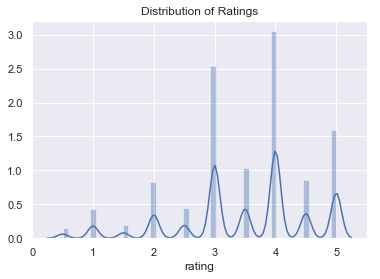

In [100]:
sns.distplot(df_ratings["rating"].values, norm_hist=True)  # games played

plt.xlabel("rating")
plt.title("Distribution of Ratings")
plt.show()

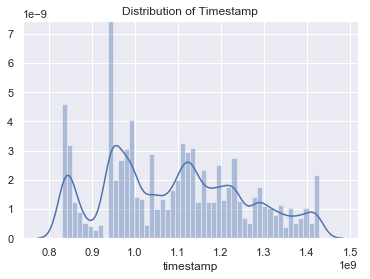

In [101]:
sns.distplot(df_ratings["timestamp"].values, norm_hist=True)  # games played

plt.xlabel("timestamp")
plt.title("Distribution of Timestamp")
plt.show()

In [102]:
df_ratings.drop(["timestamp"], axis=1, inplace=True)
df_ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [106]:
df_ratings["rating_of_drama_movies"] = df_ratings["rating"]
drama_movies_movieId = df_movies[df_movies["genres"] == "Drama"]["movieId"]

df_ratings["rating_of_action_movies"] = df_ratings["rating"]
action_movies_movieId = df_movies[df_movies["genres"] == "Action"]["movieId"]

i=0
for element in df_ratings.movieId:
    if element in drama_movies_movieId:
        if element in action_movies_movieId:
            df_ratings["rating_of_drama_movies"][i] = df_ratings["rating"][i]
            df_ratings["rating_of_action_movies"][i] = df_ratings["rating"][i]
        else:
            df_ratings["rating_of_drama_movies"][i] = float('NaN')
            df_ratings["rating_of_action_movies"][i] = float('NaN')          
    else:
        df_ratings["rating_of_drama_movies"][i] = float('NaN')
        df_ratings["rating_of_action_movies"][i] = float('NaN')
    i=i+1

In [107]:
df_ratings.head()

,userId,movieId,rating,rating_of_drama_movies,rating_of_action_movies
0,1,2,3.5,NaN,NaN
1,1,29,3.5,NaN,NaN
2,1,32,3.5,NaN,NaN
3,1,47,3.5,NaN,NaN
4,1,50,3.5,NaN,NaN


In [108]:
df_ratings.isnull().sum()  # NaN counts in each column

userId                         0
movieId                        0
rating                         0
rating_of_drama_movies     70000
rating_of_action_movies    70000
dtype: int64

In [14]:
df_ratings["rating_of_action_movies"] = df_ratings["rating"]
action_movies_movieId = df_movies[df_movies["genres"] == "Action"]["movieId"]

i=0
for element in df_ratings.movieId:
    if element in action_movies_movieId:
        df_ratings["rating_of_action_movies"][i] = df_ratings["rating"][i]
    else:
        df_ratings["rating_of_action_movies"][i] = float('NaN')
    i=i+1

In [15]:
df_ratings.head()

,userId,movieId,rating,rating_of_drama_movies,rating_of_action_movies
0,1,2,3.5,NaN,NaN
1,1,29,3.5,NaN,NaN
2,1,32,3.5,NaN,NaN
3,1,47,3.5,NaN,NaN
4,1,50,3.5,NaN,NaN


In [16]:
df_ratings.isnull().sum()  # NaN counts in each column

userId                         0
movieId                        0
rating                         0
rating_of_drama_movies     25269
rating_of_action_movies    29817
dtype: int64

In [53]:
index2drop = df_ratings[df_ratings["rating_of_drama_movies"].isnull()].index  # we use the index attribute here
                                            # since, we have a dataframe
df_ratings.drop(index2drop, inplace=True)

In [54]:
n_rows, n_columns = df_ratings.shape  # get the shape of dataframe
print("number of rows in ratings data: {}, number of columns in ratings data: {}".format(n_rows, n_columns))

number of rows in ratings data: 7721, number of columns in ratings data: 5


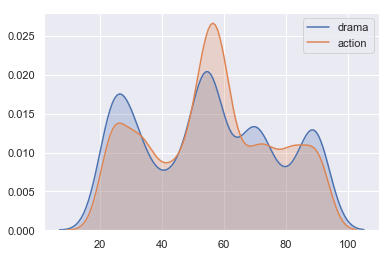

In [55]:

past_df = df_ratings[(df_ratings["rating_of_drama_movies"] < 3.5)]
gs_df = df_ratings[(df_ratings["rating_of_action_movies"] > 3)]

ax = sns.kdeplot(past_df["userId"].rename("drama"), shade=True)
sns.kdeplot(gs_df["userId"].rename("action"), ax=ax, shade=True)

plt.show()

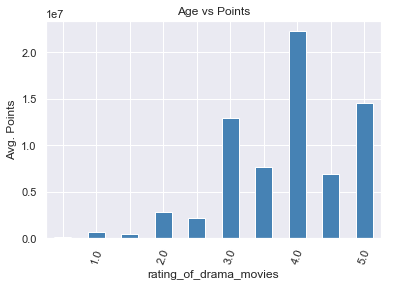

In [37]:
min_drama = df_ratings["rating_of_drama_movies"].min()
max_drama = df_ratings["rating_of_drama_movies"].max()

drama_group = df_ratings.groupby(by="rating_of_drama_movies").sum()  # group by age and take sum of each column
pts_game = drama_group["rating_of_action_movies"]  # find pts avg. at each age

ax = pts_game.plot(kind="bar",
                   color="steelblue",
                   rot=70)

for tick in ax.xaxis.get_major_ticks()[::2]:  # just to make it more readable
    tick.label1.set_visible(False)            # hiding some xticks

plt.ylabel("Avg. Points")
plt.title("Age vs Points")
plt.show()

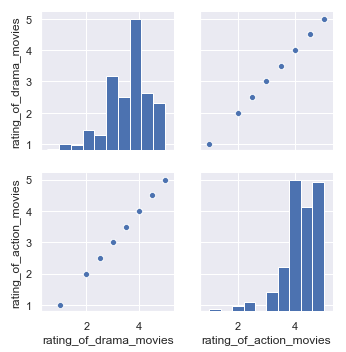

In [20]:
cols2plot = ["rating_of_drama_movies", "rating_of_action_movies"]
sns.pairplot(data=df_ratings, vars=cols2plot)

plt.show()

In [11]:
import statistics

print("mean rating of drama movies: {:.2f}".format(statistics.mean(drama_movies)))

mean rating of drama movies: 3.52


In [14]:
action_movies=[]
action_movies_movieId = df_movies[df_movies["genres"] == "Action"]["movieId"]

i=0
for element in df_ratings.movieId:
    if element in action_movies_movieId:
        action_movies.append(df_ratings["rating"][i])
        i=i+1
        

print("mean rating of action movies: {:.2f}".format(statistics.mean(action_movies)))

mean rating of action movies: 3.50


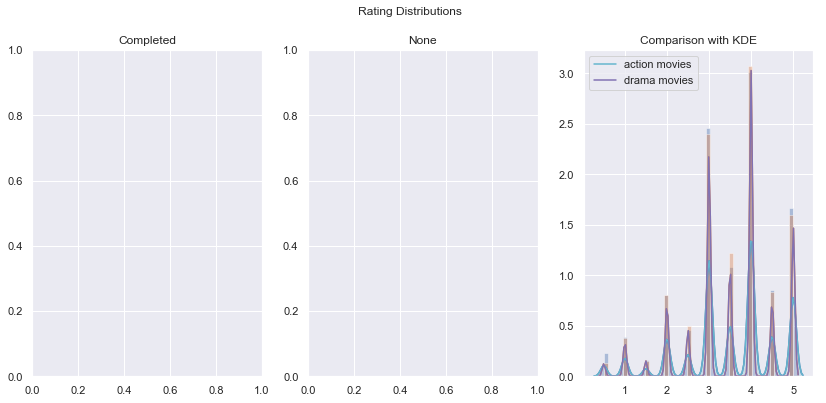

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart


sns.distplot(action_movies, norm_hist=True)  # games played
ax[0].set_title("Completed")

sns.distplot(drama_movies, norm_hist=True)  # games played
ax[1].set_title("None")

sns.kdeplot(action_movies, shade=True, label="action movies", ax=ax[2], color="c")
sns.kdeplot(drama_movies, shade=True, label="drama movies", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Rating Distributions")
plt.show()